In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

from matplotlib.animation import PillowWriter
from IPython.display import Image, display  # (keep your existing HTML import)

In [15]:
# Create k values from 25 up to 100 and back to 25 with step 0.05
k_vals = np.arange(40, 100 + 0.5, 0.5)
k_vals = np.concatenate((k_vals, k_vals[::-1]))  # go up then back down
x = np.linspace(-1.73, 1.73, 1000)

# Precompute sqrt term (clipped) and use real cube-root for x^2
sqrt_term = np.sqrt(np.clip(3 - x**2, 0, None))

# Snapshot function to generate y values for a given k
ysnap = np.cbrt(x**2) + 0.9 * np.sin(65 * x) * sqrt_term

# Estimate y-limits using a couple of sample k values to keep the autoscale stable
y_sample1 = np.cbrt(x**2) + 0.9 * np.sin(k_vals[0] * x) * sqrt_term
y_sample2 = np.cbrt(x**2) + 0.9 * np.sin(k_vals[len(k_vals)//4] * x) * sqrt_term
ymin = min(y_sample1.min(), y_sample2.min()) - 0.1
ymax = max(y_sample1.max(), y_sample2.max()) + 0.1


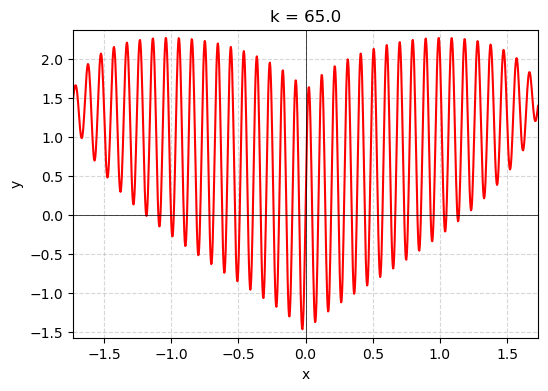

In [16]:
# Snapshot of the heart equation for a given k
fig, ax = plt.subplots(figsize=(6, 4))

line, = ax.plot(x, ysnap, 'r')
ax.axvline(0, color='k', linewidth=0.5)
ax.axhline(0, color='k', linewidth=0.5)

ax.set_xlim(x.min(), x.max())
ax.set_ylim(ymin, ymax)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'k = {65:.1f}')
ax.grid(linestyle='--', alpha=0.5)

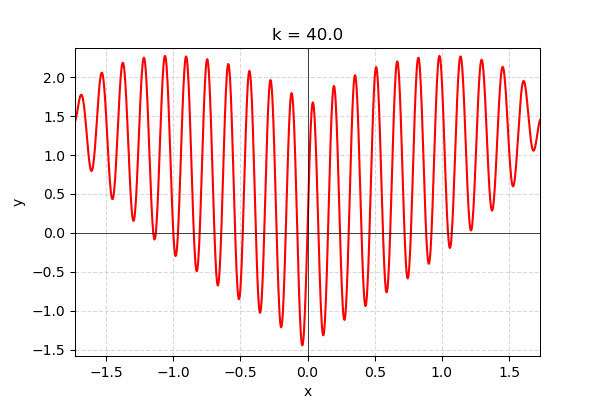

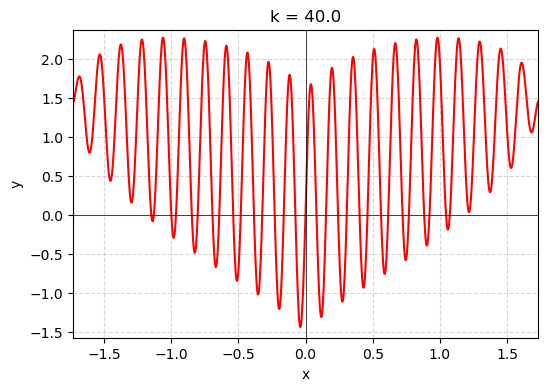

In [17]:
# Generate the animation
fig, ax = plt.subplots(figsize=(6, 4))

line, = ax.plot([], [], 'r')
ax.axvline(0, color='k', linewidth=0.5)
ax.axhline(0, color='k', linewidth=0.5)

ax.set_xlim(x.min(), x.max())
ax.set_ylim(ymin, ymax)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(linestyle='--', alpha=0.5)

def init():
    line.set_data([], [])
    return (line,)

def update(i):
    ik = k_vals[i]
    y = np.cbrt(x**2) + 0.9 * np.sin(ik * x) * sqrt_term
    line.set_data(x, y)
    ax.set_title(f'k = {ik:.1f}')
    return (line,)

anim = animation.FuncAnimation(fig, update, frames=len(k_vals), init_func=init, blit=True, interval=30)

fps = int(round(1000 / 30))  # ~33 fps to match interval
anim.save("heart_reflect.gif", writer=PillowWriter(fps=fps), dpi=100)

display(Image(filename="heart_reflect.gif"))